In [1]:
%load_ext autoreload
%autoreload 2

import os
print(os.getcwd())
import sys
sys.path.append(os.path.abspath(".."))

/root/code/Vivi-dsz/value_mapping/value_mapping/notebooks


In [2]:


import pandas as pd
from backend.preprocess.data_prep import *
from backend.preprocess.params import *
from backend.preprocess.openai import *
from backend.preprocess.score_sentiment import *
from backend.preprocess.language import *
from backend.preprocess.bert import BERTTopic
from backend.preprocess.alignment_score import get_alignment_summary
from backend.preprocess.kw_counter import count_kw_in_tokens
from data.raw.brands_about_us import brand_text


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


NameError: name 'openai_api_key' is not defined

In [9]:
file_path = '/root/code/Vivi-dsz/value_mapping/value_mapping/data/raw/user_reviews_v01.csv'
reviews_df = pd.read_csv(file_path)
reviews_df

,reviewId,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,app
0,f97ba6d2-4d7c-4aab-ae45-a847584972cf,was using stocard everyday. without any notice...,1,0,25.29.239,2025-07-27 12:10:19,Hello and thank you for your review.\nThe loya...,2025-07-27 12:30:43,25.29.239,Klarna
1,e325f04e-0b7b-45ae-9013-a01a016baeab,Zero (0) of my cards transfered from Stocard. ...,1,0,25.29.239,2025-07-27 12:03:24,Thank you for the review. we understand that y...,2025-07-15 23:49:02,25.29.239,Klarna
2,f26beb63-d371-4759-8af7-cf4e0bf7421f,Nobody should use it. They ruined(acquired) th...,1,0,25.29.239,2025-07-27 06:28:26,Thank you for the review. We understand that y...,2025-07-27 06:49:25,25.29.239,Klarna
3,eed09a6f-c72a-4662-bd81-8d19d73a01d6,This Klarna app is garbage. When they switched...,1,0,25.29.239,2025-07-27 05:22:54,Thanks for the review. We are sorry to hear th...,2025-07-27 05:43:29,25.29.239,Klarna
4,1bcfeb1b-ca54-4883-9c12-34df63e6e8c4,"Absolutely horrendous, cannot transfer years o...",1,0,NaN,2025-07-27 01:22:31,Thank you for the review. We try to innovate o...,2025-07-27 01:41:27,NaN,Klarna
...,...,...,...,...,...,...,...,...,...,...
4995,8e94a970-453d-48c9-9c09-495acefac2cd,All fun untill you got the end of the month an...,2,2,22.15.2,2023-07-01 16:11:03,Hey Túlio! We always strive to offer you the b...,2023-07-03 09:41:35,22.15.2,Bunq
4996,740e96d7-d98e-44f2-a869-8c4045c9a38f,I like the concept of the app. But the navigat...,4,0,22.15.2,2023-07-01 08:29:41,Hey there Angelica 👋 Thanks for the review 🚀 I...,2023-07-03 09:17:55,22.15.2,Bunq
4997,bbffd767-a724-44ec-b3d8-de9dc215424b,Great app,5,0,22.15.2,2023-07-01 03:49:05,Hey Christian 👋 Thank you for the five-star re...,2023-07-03 09:12:23,22.15.2,Bunq
4998,f2c6266c-2623-41a3-a9dd-c1e8157b1433,Amazing l like it,3,0,22.15.2,2023-07-01 00:24:33,Hey Ali 👋 Thank you for your review. We’re alw...,2023-07-03 09:11:42,22.15.2,Bunq


## Sample "About Me" Text

In [5]:
brand_text ={"Klrana" : """
Hej, we’re Klarna
We’re here to set the new standard for how people shop and pay–proudly Swedish.

Smarter shopping starts here
At Klarna, we're redefining the shopping experience to help people get more out of their money. Here's how:
Pay your way: Choose from interest-free payment plans and customizable payment options
Earn while you shop: Receive cashback directly in your Klarna balance.
Secure shopping: Keep your data safe using advanced encryption and 24/7 fraud monitoring.
Our History
Made in Stockholm
Three young Swedish entrepreneurs had a brilliant idea back in 2005—but not the best name. Kreditor became Klarna in 2010.
Unicorn status unlocked
In 2012, Klarna reached a significant milestone with a $1B+ valuation, recognizing our rapid growth and market impacts.
Klarna's family grows
In 2014, Klarna acquired SOFORT, creating Europe’s fastest-growing online payments group.
A bold new era
In 2017, Klarna transformed from blue to bold pink, and secured a full banking license, expanding our capabilities to serve customers.
The Klarna app arrives
Launched in 2018, the Klarna app provides users with tools for smarter shopping, budget management, and seamless payments across online and in-store experiences.
The smart spending leader
As of 2025, Klarna is a leader in digital payments, offering flexible payment options, cashback, and financial tools to millions of shoppers worldwide.

The numbers don't lie
100m
active consumers

720k
M erchants

2.9m
transactions per day

26
C ountries supported

Trusted by the world's most loved brands

Meet the board
The board is Klarna’s top decision-making body, overseeing strategy, operations, and corporate governance to ensure accountability to both the organization and investors.

Get to know our culture
With offices around the world, our global team blends start-up energy with a drive to create bold, impactful change and redefine smarter spending.
"""}

In [ ]:
rows = []
for brand, raw_text in brand_text.items():
    text, tokens = clean_and_tokenize(raw_text)
    rows.append({
        "brand": brand,
        "tokens": tokens
    })

df = pd.DataFrame(rows)
print(df)

## Questions ##

1. What we do with typos? Like C ountries?

## Clean Data

In [10]:
reviews_df["content_tockens"] = reviews_df["content"].apply(lambda x: clean_and_tokenize(x)[1])
reviews_df["content_cleaned"] = reviews_df["content"].apply(lambda x: clean_and_tokenize(x)[0])

In [ ]:
# path = '/root/code/Vivi-dsz/value_mapping/value_mapping/data/preprocessed/user_reviews.csv'
# reviews_df.to_csv(path)

## Topic Encoding

## 1. OpenAI API 

Check https://github.com/openai/openai-python
https://github.com/openai/openai-python?utm_source=chatgpt.com

In [13]:
# Apply it to the DataFrame (slow if many rows)
df_sample = reviews_df.sample(150, random_state=42)

# df_sample["openai_topic"] = df_sample["content"].apply(
#     lambda x: get_topic_from_openai_constrained(x, values_keywords)
# )

df_sample[["topic_1", "topic_2", "sentiment"]] = df_sample["content"].apply(
    lambda x: pd.Series(get_topic_from_openai_constrained(x, values_keywords))
)


['accessibility', 'accountability', 'aesthetics', 'affordable', 'ai', 'ambition', 'automation', 'autonomy', 'bravery', 'choice', 'clarity', 'clean', 'collaboration', 'community', 'control', 'convenience', 'cooperation', 'credibility', 'customer orientation', 'customer service', 'customization', 'cutting-edge', 'data-driven', 'development', 'digital', 'disruption', 'diversity', 'ease', 'education', 'efficiency', 'empowerment', 'engagement', 'ethics', 'expansion', 'fairness', 'financial independence', 'flexibility', 'freedom', 'functional', 'future', 'global access', 'goal', 'growth', 'helpful', 'honesty', 'impact', 'inclusion', 'independence', 'innovation', 'integrity', 'internationalwealth', 'intuitive', 'inventive', 'local relevance', 'modernity', 'parity', 'personalization', 'planning', 'proactivity', 'product quality', 'protection', 'reliability', 'responsibility', 'safety', 'satisfaction', 'scalability', 'secure', 'self-determination', 'simple', 'simplicity', 'sincerity', 'smart', 

In [14]:
# Reverse the values_keywords dictionary
keyword_to_category = reverse_keyword_mapping(values_keywords)

# Now map it to your DataFrame
df_sample["topic1_category"] = df_sample["topic_1"].map(keyword_to_category)
df_sample["topic2_category"] = df_sample["topic_2"].map(keyword_to_category)

In [15]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1501 to 2575
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   reviewId              150 non-null    object
 1   content               150 non-null    object
 2   score                 150 non-null    int64 
 3   thumbsUpCount         150 non-null    int64 
 4   reviewCreatedVersion  121 non-null    object
 5   at                    150 non-null    object
 6   replyContent          89 non-null     object
 7   repliedAt             89 non-null     object
 8   appVersion            121 non-null    object
 9   app                   150 non-null    object
 10  content_tockens       150 non-null    object
 11  content_cleaned       150 non-null    object
 12  topic_1               150 non-null    object
 13  topic_2               150 non-null    object
 14  sentiment             150 non-null    object
 15  topic1_category       141 non-null    obj

In [79]:
df_sample.to_csv('/root/code/Vivi-dsz/value_mapping/value_mapping/data/preprocessed/openai_topics.csv')
# , encoding='utf-8',
#     sep=',', index=False)

## 2. Bert

Bert Topic includes models like OpenAI, KeyBERTInspired, MaximalMarginalRelevance
https://maartengr.github.io/BERTopic/index.html#quick-start
https://maartengr.github.io/BERTopic/getting_started/representation/representation.html


In [ ]:
#  documents are a list of cleaned review texts
docs = reviews_df["content_cleaned"].dropna().tolist()

# Initialize with your OpenAI client
berttopic = BERTTopic(docs=docs, client=client)

# Run desired topic models
berttopic.openai()
berttopic.keybert()
berttopic.mmr()

# Get combined result DataFrame
berttopic_df = berttopic.get_results()


## Evaluation

# Pipeline

In [80]:
# Detect the language of the review if necessary
reviews_df["language"] = reviews_df["content_cleaned"].apply(detect_language)

In [ ]:
# Apply sentiment to score
reviews_df["label_sentiment"] = reviews_df["score"].apply(score_to_sentiment)


In [21]:
# Apply score between -1 and 1 to sentiment
df_sample["score_sentiment"] = df_sample["sentiment"].apply(sentiment_to_score)

In [24]:
df_sample[["content", "topic1_category", "topic2_category", "sentiment", "score_sentiment"]]

,content,topic1_category,topic2_category,sentiment,score_sentiment
1501,"If there was zero stars or negative, I would h...",user_centricity,ethos,very negative,-1.0
2586,All good,user_centricity,NaN,positive,0.5
2653,I can't sign it anymore due to new detection s...,quality,NaN,negative,-0.5
1055,I am very satisfied with the support and under...,user_centricity,user_centricity,very positive,1.0
705,"this app is so ""smart"" that in dark mode the c...",empowerment,NaN,negative,-0.5
...,...,...,...,...,...
3238,The app looks friendly to use for beginners an...,simplicity,user_centricity,negative,-0.5
2974,cool,innovation,NaN,positive,0.5
3580,new design couldn't possibly be any worse - on...,quality,NaN,very negative,-1.0
2887,"excellent, easy to make payments to other card...",simplicity,community,very positive,1.0


In [26]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1501 to 2575
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   reviewId              150 non-null    object 
 1   content               150 non-null    object 
 2   score                 150 non-null    int64  
 3   thumbsUpCount         150 non-null    int64  
 4   reviewCreatedVersion  121 non-null    object 
 5   at                    150 non-null    object 
 6   replyContent          89 non-null     object 
 7   repliedAt             89 non-null     object 
 8   appVersion            121 non-null    object 
 9   app                   150 non-null    object 
 10  content_tockens       150 non-null    object 
 11  content_cleaned       150 non-null    object 
 12  topic_1               150 non-null    object 
 13  topic_2               150 non-null    object 
 14  sentiment             150 non-null    object 
 15  topic1_category       14

In [27]:
df_sample["topic1_category"].unique()

array(['user_centricity', 'quality', 'empowerment', 'innovation', nan,
       'ethos', 'simplicity', 'community', 'growth'], dtype=object)

In [28]:
df_sample["topic2_category"].unique()

array(['ethos', nan, 'user_centricity', 'quality', 'simplicity',
       'empowerment', 'innovation', 'community'], dtype=object)

In [34]:
df_sample.columns

Index(['reviewId', 'content', 'score', 'thumbsUpCount', 'reviewCreatedVersion',
       'at', 'replyContent', 'repliedAt', 'appVersion', 'app',
       'content_tockens', 'content_cleaned', 'topic_1', 'topic_2', 'sentiment',
       'topic1_category', 'topic2_category', 'score_sentiment'],
      dtype='object')

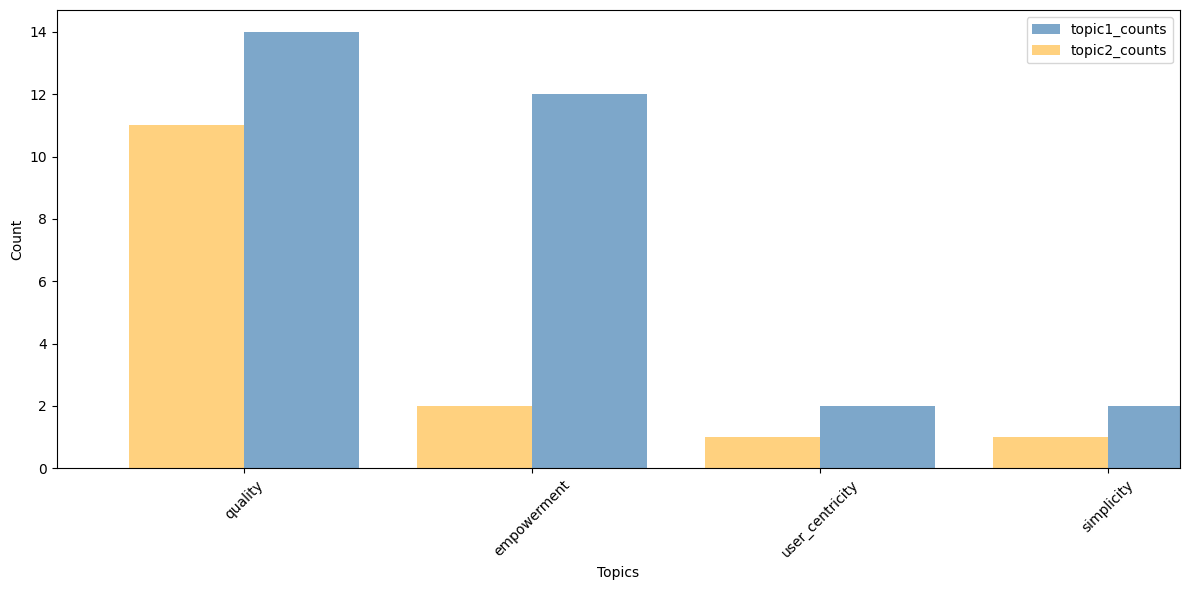

In [36]:
import matplotlib.pyplot as plt

# Filter for one app (e.g., Klarna)
app_name = "Klarna"
filtered_df = df_sample[df_sample["app"] == app_name]


topic1_counts = filtered_df["topic1_category"].value_counts()
topic2_counts = filtered_df["topic2_category"].value_counts()
fig, ax = plt.subplots(figsize=(12, 6))
topic1_counts.plot(kind='bar', color='steelblue', alpha=0.7, label='topic1_counts', position=0, width=0.4)
topic2_counts.plot(kind='bar', color='orange', alpha=0.5, label='topic2_counts', position=1, width=0.4)
#plt.title("Regression topics vs. AI topics Distribution")
plt.xlabel("Topics")
plt.ylabel("Count")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Alignment Summary

brand_kw_df = get_brand_counts(brand_text, keywords)
review_kw_df = get_review_counts(df_reviews, keywords)

summary = get_alignment_summary("Klarna", brand_kw_df, review_kw_df)
print(summary)